| ![EEW logo](https://github.com/edgi-govdata-archiving/EEW-Image-Assets/blob/main/Jupyter%20instructions/eew.jpg?raw=true) | ![EDGI logo](https://github.com/edgi-govdata-archiving/EEW-Image-Assets/blob/main/Jupyter%20instructions/edgi.png?raw=true) |
|---|---|


This notebook is licensed under GPL 3.0. Please visit our Github [repo](https://github.com/edgi-govdata-archiving/ECHO_modules) for more information.

The notebook was collaboratively authored by the Environmental Data & Governance Initiative (EDGI) following [our authorship protocol](https://docs.google.com/document/d/1CtDN5ZZ4Zv70fHiBTmWkDJ9mswEipX6eCYrwicP66Xw/)

For more information about this project, visit [our website](https://www.environmentalenforcementwatch.org/)

This is a Jupyter Notebook - a way to organize Python computer programming code. Hosting the notebook on Google Colab allows you to access and visualize data without actually needing to do any coding! The code is left visible for individuals with a knowledge of Python or for those wondering how this site was put together. This allows for a more interactive user experience.

Be sure to read the instructions in "How to Run" (below)  and the notes above each cell for important tips and context!

# ECHO_modules
*ECHO_modules* is a Python package repository for analyzing a copy of the US Environmental Protection Agency's (EPA) Enforcement and Compliance History Online (ECHO) database.

### Background
The US EPA collects a wide variety of data concerning environmental pollution and makes this available through several portals. The ECHO database collates information on industrial facilities' compliance with environmental protection laws like the Clean Water Act and regulatory agencies' enforcement of those laws. ECHO records reported violations, agency inspections of facilities, penalties paid by companies for infractions. It also incorporates information from other sources, such as reported pollutant releases from the Toxics Release Inventory and socio-economic information from EJScreen.

Unfortunately, both the web portal for ECHO (echo.epa.gov) and its API have a number of limitations. First, EPA generally only makes the past 3-5 years worth of data available through these services. Second, EPA typically does not allow aggregating information into meaningful views, such as reports of inspections by Census tract or ZIP code. Instead, searches on echo.epa.gov are usually facility-oriented. This makes it hard to understand the state of environmental enforcement and compliance across an entire geography, company, or industry sector.

In response, we make regular copies of the full set of historical records in ECHO by scraping echo.epa.gov [here](https://echo.epa.gov/files/echodownloads/). We load a number of specific tables into a [Postgresql database](https://github.com/sunggheel/edgipgdb) hosted at Stony Brook University (SBU). These tables are then linked with one another through various lookups and materialized views. For instance, the table that contains summary information about facilities (ECHO_EXPORTER) is linked to the table with detailed records on Clean Water Act violations through the `NPDES_ID` key.

`ECHO_modules` provides convenient dataset definitions and pre-defined queries that enable users to retrieve information from the SBU database and to visualize it as tables, maps, and charts. It also supports user-defined queries. With `ECHO_modules`, users can easily access summaries of EPA's records for specific geographies (e.g. a set of ZIP codes) and examine these records in relation to EPA's measures of environmental inequalities (from EJScreen).

Learn more about the SBU copy of ECHO and how it is used by ECHO_modules [here](https://github.com/edgi-govdata-archiving/ECHO_modules/blob/main/SBU-db.md). EDGI's Environmental Enforcement Watch (EEW) works with `ECHO_modules` extensively. For more on the EEW project, visit [here](https://environmentalenforcementwatch.org/) or check out project-specific repositories in the EDGI organization on GitHub.

### Interpreting ECHO Data
The ECHO database is notoriously incomplete and biased. EDGI EEW's own research, based on `ECHO_modules` and published [here](https://envirodatagov.org/wp-content/uploads/2022/09/Gaps_and_Disparities_Report.pdf), has found the following:

> * Over 19,000 facilities regulated under foundational environmental protection laws are missing basic information such as their latitude and longitude. Nearly all — 19,657 out of 19,675 (99.9%) — of these are SDWA-regulated facilities.
> * Data needed for basic EJ assessments, such as the percent minority population surrounding a facility or the Census block it resides in, is missing for 14% of the facilities in EPA’s most public-facing database. This increases to 83% of facilities regulated under SDWA.
> * Nationally, the typical facility regulated under each of these environmental protection laws is missing:
>   * 86% of CWA-specific information
>   * 86% of RCRA-specific information
>   * 71% of CAA-specific information
>   * 40% of SDWA-specific information
> * Facilities in majority-minority communities have somewhat worse data quality scores than facilities in majority-white communities, for all acts except SDWA.
> * Data missingness is substantially worse for facilities in areas already screened by EPA to be of particular concern for environmental injustices and majority-minority areas when looking at Clean Water Act inspections in particular.
> * 78% of all facilities regulated under the CWA are missing inspection counts, but only 75% of facilities in majority white areas, rising to 83% of facilities in majority-minority areas.
> * Western states including Texas, New Mexico, Colorado, Utah, and Nevada are much worse when it comes to inspection data completeness for facilities in majority-minority communities.

Simply put, ECHO records are flawed because they rely on industry and state self-reporting. For instance, the emissions levels industry provides to EPA are typically estimates rather than direct measurements. ProPublica [has found](https://www.propublica.org/article/whats-polluting-the-air-not-even-the-epa-can-say) that these estimates actually tend to be *overestimates* - industry knows EPA lacks the will and capacity to look into large emitters, while submitting lower numbers might raise suspicion.

ECHO records also reflect a flawed governance system. Determining that a facility is in violation of its permit to pollute typically requires either accurate and honest self-reporting of emissions, or regulatory inspections of the facility. However, facility inspections have been in decline since at least the Obama administration. Thus, "true" violations are unlikely to be noticed and recorded. In other words, the ECHO database is rife with type II statistical errors ("false negatives").

Even when violations are flagged, it is important to keep in mind that these represent emissions above and beyond permitted thresholds (if they are not paperwork violations), but whether or not these permitted thresholds are adequate is entirely different question. Just because a facility is *not* in violation of its permit does not mean that it is inconsequential to human and environmental health, since most permits to pollute do not account for the cumulative effects of multiple polluters in a region or the synergistic effects of multiple pollutants.

[According to](https://global.oup.com/academic/product/next-generation-compliance-9780197656747) former EPA director of enforcement and compliance assurance Cynthia Giles (2020), records related to the Clean Water Act's National Pollutant Discharge Elimination System (NPDES) tend to be the most reliable, in part because of federal requirements that all regulated facilities submit digitized records straight to US EPA.

Any interpretations you make of ECHO data accessed through `ECHO_modules` should keep all the above in mind. For instance, EEW prefers to use language such as "reported violations" and "estimated emissions" when discussing findings.

### How to Run this Notebook
![Instructions for running a Jupyter Notebook](https://github.com/edgi-govdata-archiving/EEW-Image-Assets/blob/main/overall_instructions.png?raw=true)

# Install ECHO_modules

In [ ]:
# Installation of these not necessary in default Colab environment (already installed)
%pip install geopandas &>/dev/null;
%pip install matplotlib &>/dev/null;
%pip install folium &>/dev/null;
%pip install ipywidgets &>/dev/null;
%pip install ipyleaflet &>/dev/null;
%pip install ipython &>/dev/null;
%pip install seaborn &>/dev/null;
%pip install tqdm &>/dev/null;
%pip install pyspark &>/dev/null;
%pip install delta &>/dev/null;


## Install the EDGI ECHO/RSEI data access package
This step is required.

In [ ]:
!pip install ECHO_modules >&/dev/null;

## GET API TOKEN


In [1]:
from ECHO_modules.get_data import get_echo_api_access_token

token = get_echo_api_access_token()

Get the token by clicking the link above, then paste it inside a token.txt file in the current directory.
Waiting for token.txt file...
Token found! Verifying...
✅ Token verified successfully!


# Basic Usage
## Analyze Currently Active Facilities in a County

In the following example, we retrieve all of the currently active facilities (according to EPA) in Erie County in New York.

In [2]:
from ECHO_modules.utilities import get_active_facilities # Use the get_active_facilities function

erie = get_active_facilities("NY", "County", ["ERIE"], api=True, token=token)
erie

ECHO_EXPORTER_1757996515.json: 77.4MiB [00:03, 20.8MiB/s]


Reading data...


FAC_NAME FAC_STATE  \
REGISTRY_ID                                                                 
110000566361                           TYSON PREPARED FOODS INC        NY   
110055415974                    BOZINS MICHAEL - PROPERTY OWNER        NY   
110004525158                          HOME DEPOT USA INC HD1231        NY   
110004417845                                     TONAWANDA COKE        NY   
110060282661  ECDPW - CAIN ROAD OVER BIG SISTER CREEK - BIN ...        NY   
...                                                         ...       ...   
110056359685                               JOE'S SERVICE CENTER        NY   
110000326978                         BUCKEYE - BUFFALO TERMINAL        NY   
110019160637                              STEVE BALDO CHEVROLET        NY   
110001593026                                     COLORFORMS INC        NY   
110060260079                                WELDED TUBE USA INC        NY   

             FAC_COUNTY FAC_FIPS_CODE FAC_EPA_REGION FAC_INDIAN_CNTRY_FLG  \
REGISTRY_ID                                                                 
110000566361       ERIE         36029             02                    N   
110055415974       ERIE         36029             02                    N   
110004525158       ERIE         36029             02                    N   
110004417845       ERIE         36029             02                    N   
110060282661       ERIE         36029             02                    N   
...                 ...           ...            ...                  ...   
110056359685       ERIE         36029             02                    N   
110000326978       ERIE         36029             02                    N   
110019160637       ERIE         36029             02                    N   
110001593026       ERIE         36029             02                    N   
110060260079       ERIE         36029             02                    N   

             FAC_NAA_FLAG    FAC_LAT   FAC_LONG       FAC_MAP_ICON  ...  \
REGISTRY_ID                                                         ...   
110000566361            Y  42.871559 -78.852916   MULT-IC-MN-N.png  ...   
110055415974            Y  42.885430 -78.814240   RCRA-IC-MN-N.png  ...   
110004525158            Y  42.828870 -78.782210   RCRA-IC-MN-1.png  ...   
110004417845            Y  43.018700 -78.871140   RCRA-IC-MN-N.png  ...   
110060282661            Y  42.608880 -78.947210   RCRA-IC-MN-N.png  ...   
...                   ...        ...        ...                ...  ...   
110056359685            Y  42.962390 -78.838370  NONE-UNK-MN-N.png  ...   
110000326978            Y  42.865770 -78.831100   MULT-NC-MJ-2.png  ...   
110019160637            Y  42.985540 -78.567681    CAA-IC-MN-N.png  ...   
110001593026            Y  43.019695 -78.859634   RCRA-IC-MN-N.png  ...   
110060260079            Y  42.815608 -78.845918   RCRA-IC-MN-5.png  ...   

             GHG_IDS  GHG_CO2_RELEASES TRI_RELEASES_TRANSFERS  \
REGISTRY_ID                                                     
110000566361     NaN               NaN                    NaN   
110055415974     NaN               NaN                    NaN   
110004525158     NaN               NaN                    NaN   
110004417845     NaN               NaN                    NaN   
110060282661     NaN               NaN                    NaN   
...              ...               ...                    ...   
110056359685     NaN               NaN                    NaN   
110000326978     NaN               NaN                    NaN   
110019160637     NaN               NaN                    NaN   
110001593026     NaN               NaN                    NaN   
110060260079     NaN               NaN              3131716.0   

             TRI_ON_SITE_RELEASES  TRI_OFF_SITE_TRANSFERS  TRI_REPORTER  \
REGISTRY_ID                                                               
110000566361                  NaN                     NaN           NaN   
1100

## Save this Data to CSV Format

This will export the above dataframe as a CSV. If running this notebook in Google Colab, the CSV can be found by clicking on the folder on the left-hand side of the screen and then opening the CSV sub-folder, right-clicking on the "Facilities-NY-County-Erie.csv" file and choosing Download.

First you are able to customize the name of the file we will be creating.

In [ ]:
## You may enter a name to use for the file, or use the one provided.
from ECHO_modules.utilities import dataset_filename, write_dataset

filename_widget = dataset_filename(base='Facilities',
               type='County', state='NY', regions=['Erie'])

...and now you can write the file.

In [ ]:
from ECHO_modules.utilities import write_dataset
write_dataset(erie, filename_widget.value)

## Find and Chart the 10 Facilities Least Compliant with the Resource and Conservation Recovery Act (RCRA) over the Past 12 Quarters in this County

EPA provides summary data on inspections, violations, and penalties under various environmental protection laws. In the following example, we access that summary data for RCRA-regulated facilities in Erie County, sort it, and then chart it.

<Axes: title={'center': 'RCRA facilities with the most non-compliant quarters'}, xlabel='Non-compliant quarters', ylabel='Facility'>

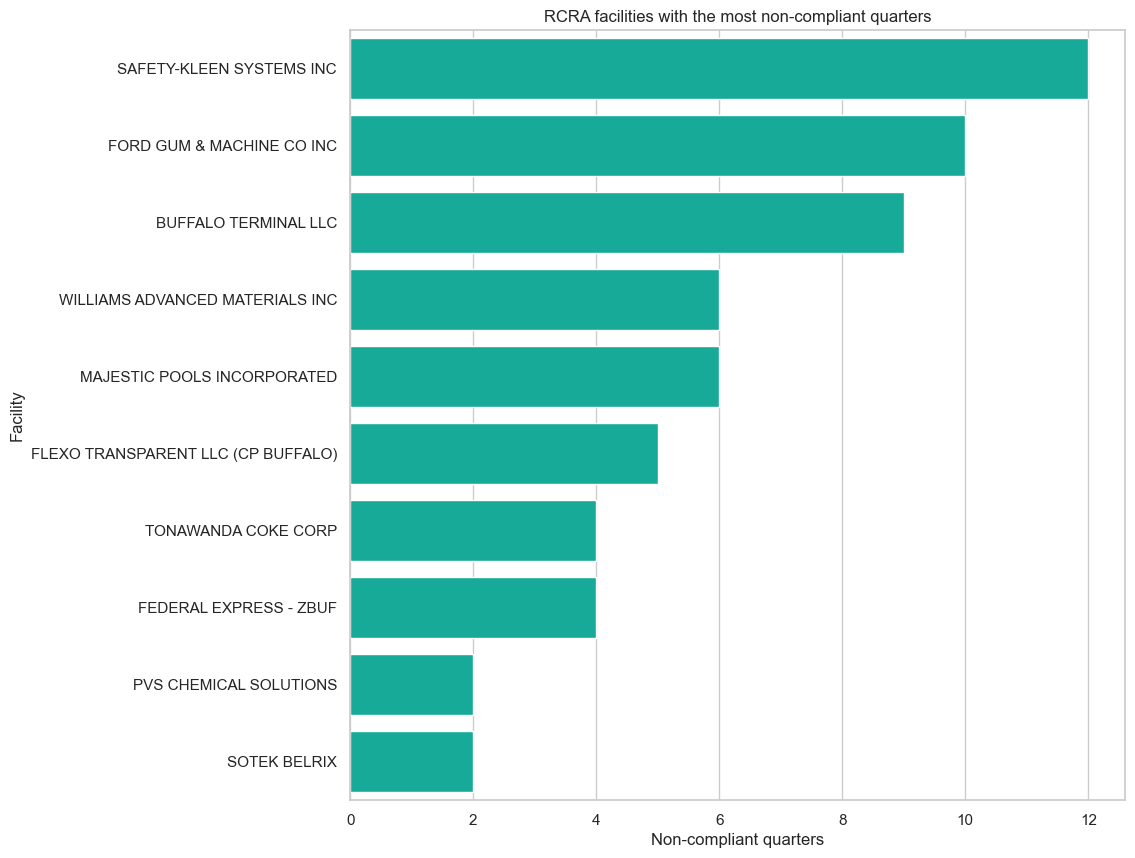

In [3]:
# Next, we enter the dataframe of Erie County facilities into the get_top_violators() function, then use chart_top_violators to visualize the result
# Use get_top_violators and chart_top_violators
from ECHO_modules.utilities import get_top_violators, chart_top_violators

(erie_top_violators, erie_all_violators) = get_top_violators( erie, flag = 'RCRA_FLAG',
                                        noncomp_field = 'RCRA_3YR_COMPL_QTRS_HISTORY',
                                        action_field = 'RCRA_FORMAL_ACTION_COUNT',
                                        num_fac=10 )
chart_top_violators(erie_top_violators, state = 'NY', selections = "Erie County",
                    epa_pgm = "RCRA" )

## Map these Top 10 RCRA Violators

In [4]:
import geopandas # Import a Python package for creating spatial dataframes
from ECHO_modules.get_data import get_spatial_data # Module for getting spatial data from the SBU database
from ECHO_modules.geographies import spatial_tables # Variables that support spatial queries
from ECHO_modules.utilities import bivariate_map, map_style # Use this function and variable to make our map

# Query and return spatial data
county, state = get_spatial_data( region_type = "County", states = ["NY"],
                                 spatial_tables = spatial_tables, region_filter = "Erie")
bivariate_map(regions = county,
              points = geopandas.GeoDataFrame(erie_top_violators,
                                              geometry=geopandas.points_from_xy(
                                                  erie_top_violators['FAC_LONG'],
                                                  erie_top_violators['FAC_LAT']),
                                                  crs=4269
                                              )
              ) # Use Geopandas to create a spatial version of this dataframe so that it can be mapped

Success: retrieved the TIGER geojson!
Creating a geopandas dataframe ...
Success: retrieved the TIGER geojson!
Creating a geopandas dataframe ...


## Create DataSet templates for all the types of ECHO records

EPA not only produces summary information on environmental enforcement and compliance programs (in its ECHO_EXPORTER records), it provides access to "raw" historical records. These can be accessed through our DataSet collections. Here we will create all of the types of DataSet. These won't hold any records yet. They are just the containers for the types of data. We will populate some of these data_sets later.

In [11]:
from ECHO_modules.make_data_sets import make_data_sets

## List of datasets to choose from
data_sets = make_data_sets([
    "RCRA Violations",
    "RCRA Inspections",
    "RCRA Penalties",
    "CAA Violations",
    "CAA Penalties",
    "CAA Inspections",
    "Combined Air Emissions",
    "Greenhouse Gas Emissions",
    "Toxic Releases",
    "CWA Violations",
    "CWA Inspections",
    "CWA Penalties",
    "SDWA Site Visits",
    "SDWA Enforcements",
    "SDWA Public Water Systems",
    "SDWA Violations",
    "SDWA Serious Violators",
    "2022 Discharge Monitoring",
    "Effluent Violations",
], api=True, token=token)
## These are described in more detail here: https://github.com/edgi-govdata-archiving/ECHO_modules/blob/main/ECHO_modules/data_set_presets.py
## and here: https://echo.epa.gov/tools/data-downloads#downloads

## Get Historical Records of RCRA Violations in this County

Here we will populate one of the DataSet containers, the one for "RCRA Violations", with a request for specific data. We use the DataSet's store_results() function to get the data from the database and keep it in a DatSetResults container owned by the DataSet.

EPA says records prior to 2001 are unreliable. First we'll let you select your years of interest...

In [8]:
from ECHO_modules.utilities import show_year_range_widget
## Slide the endpoints to the desired years
year_range = show_year_range_widget()

SelectionRangeSlider(description='Dates', index=(0, 54), layout=Layout(width='500px'), options=(1970, 1971, 19…

...and now we can populate the RCRA Violations DataSet for those years.

In [12]:
# Store results for this DataSet as a DataSetResults object
erie_rcra_violations = data_sets["RCRA Violations"].store_results(
    region_type="County", region_value=["ERIE"], state="NY",
    years=year_range.value)
erie_rcra_violations.dataframe # Show the results as a dataframe

RCRA_VIOLATIONS
Data last modified: 2025-04-02 05:01:31
County
['ERIE']
NY
select * from RCRA_VIOLATIONS_MVIEW where FAC_STATE = 'NY'


RCRA_VIOLATIONS_MVIEW_1757996758.json: 85.9MiB [00:01, 63.4MiB/s]


Reading data...
ID_NUMBER
There were 2668 program records found
got the data


ACTIVITY_LOCATION VIOLATION_TYPE  \
ID_NUMBER                                       
NYD074033101                NY          273.B   
NYD074033101                NY          273.B   
NYD074033101                NY          273.B   
NYD074033101                NY          273.B   
NYD074033101                NY          262.C   
...                        ...            ...   
NYR000232983                NY          262.C   
NYR000232983                NY          265.C   
NYR000232983                NY          265.C   
NYR000232983                NY          265.C   
NYR000232983                NY          265.C   

                                            VIOLATION_TYPE_DESC  \
ID_NUMBER                                                         
NYD074033101  Standards for Universal Waste Management: Stan...   
NYD074033101  Standards for Universal Waste Management: Stan...   
NYD074033101  Standards for Universal Waste Management: Stan...   
NYD074033101  Standards for Universal Waste Management: Stan...   
NYD074033101  Standards Applicable to Generators of HW: Pre-...   
...                                                         ...   
NYR000232983  Standards Applicable to Generators of HW: Pre-...   
NYR000232983  Interim Status Standards for Owners and Operat...   
NYR000232983  Interim Status Standards for Owners and Operat...   
NYR000232983  Interim Status Standards for Owners and Operat...   
NYR000232983  Interim Status Standards for Owners and Operat...   

             VIOL_DETERMINED_BY_AGENCY DATE_VIOLATION_DETERMINED  \
ID_NUMBER                                                          
NYD074033101                       S                  2016-07-13   
NYD074033101                       S                  2016-07-13   
NYD074033101                       S                  2016-07-13   
NYD074033101                       S                  2016-07-13   
NYD074033101                       E                  2019-08-20   
...                                ...                       ...   
NYR000232983                       S                  2019-07-09   
NYR000232983                       S                  2019-07-09   
NYR000232983                       S                  2019-07-09   
NYR000232983                       S                  2019-07-09   
NYR000232983                       S                  2019-07-09   

             ACTUAL_RTC_DATE SCHEDULED_COMPLIANCE_DATE FAC_DERIVED_HUC  \
ID_NUMBER                                                                
NYD074033101      08/15/2016                       NaN        04120104   
NYD074033101      08/15/2016                       NaN        04120104   
NYD074033101      08/15/2016                       NaN        04120104   
NYD074033101      08/15/2016                       NaN        04120104   
NYD074033101      08/30/2019                       NaN        04120104   
...                      ...                       ...             ...   
NYR000232983      08/07/2019                       NaN        04120104   
NYR000232983      08/07/2019                       NaN        04120104   
NYR000232983      08/07/2019                       NaN        04120104   
NYR000232983      08/07/2019                       NaN        04120104   
NYR000232983      08/07/2019                       NaN        04120104   

               REGISTRY_ID                      FAC_NAME  ... FAC_ZIP  \
ID_NUMBER                                                 ...           
NYD074033101  110000326718               FMC CORPORATION  ...   14150   
NYD074033101  110000326718               FMC CORPORATION  ...   14150   
NYD074033101  110000326718               FMC CORPORATION  ...   14150   
NYD074033101  110000326718               FMC CORPORATION  ...   14150   
NYD074033101  110000326718               FMC CORPORATION  ...   14150   
...                    ...                           ...  ...     ...   
NYR000232983  110070122099  ATHENEX PHARMA SOLUTIONS LLC  ...   14031  

## Show RCRA Violations Over Time in a Chart

c:\Users\enost\Documents\GitHub\EDGI\ECHO_modules\ECHO_modules\DataSetResults.py:100: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  d = d.resample("Y").sum()


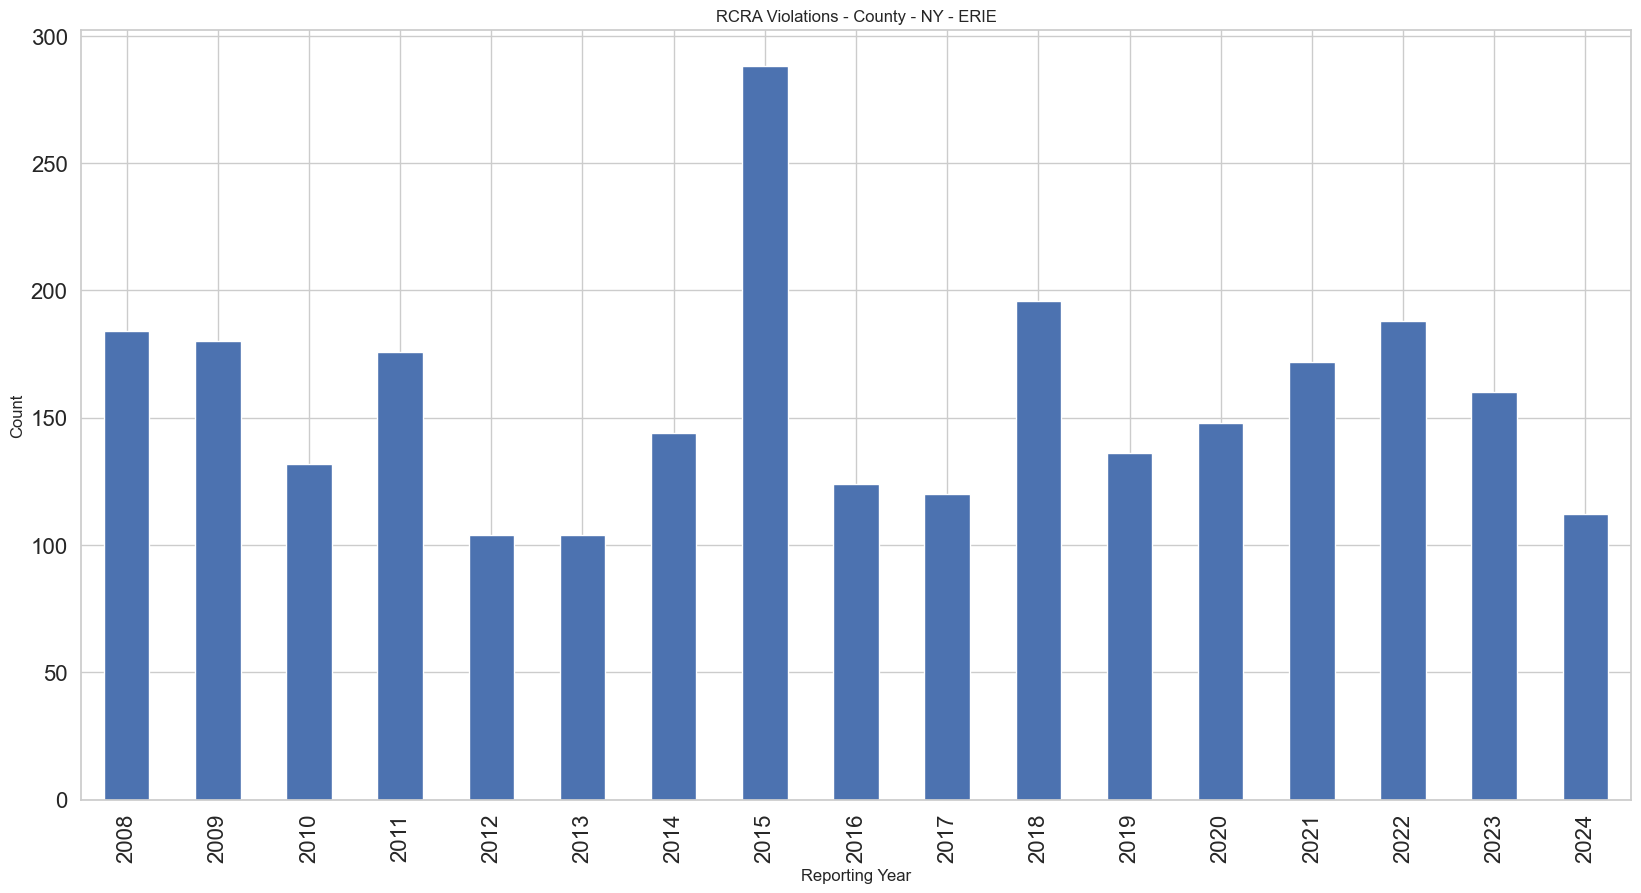

In [13]:
erie_rcra_violations.show_chart()

## Map Facilities in this County with Recorded RCRA Violations

In [14]:
from ECHO_modules.utilities import aggregate_by_facility, point_mapper # Import relevant modules

erie_rcra_violations.region_value=["ERIE"] # (re)set the region_value as a list
# Aggregate each entry using this function. In the case of RCRA violations,
# it will summarize each type of violation (permit, schedule, effluent, etc.)
# and then aggregate them for each facility over time.
# By setting other_records to True, we also get RCRA-regulated facilities in the
# county without records of violations.
aggregated_results = aggregate_by_facility(
    erie_rcra_violations, erie_rcra_violations.dataset.name, other_records=True, api=True, token=token)
# Map each facility as a point, the size of which corresponds to the number of reported violations since 2001.
point_mapper(aggregated_results["data"], aggregated_results["aggregator"],
             quartiles=True, other_fac=aggregated_results["diff"])

ECHO_EXPORTER_1757996771.json: 77.4MiB [00:03, 25.2MiB/s]


Reading data...


# Advanced Usage

## Select an area of interest using a map
Administrative boundaries like counties are only so meaningful when it comes to understanding environmental pollution, enforcement, and compliance trends near you. You might want to draw your own neighborhood - this utility lets you do that, and then retrieve records for facilities within those boundaries.

Run the following cell, use the tools in the left part of the map to create a shape, and then run the cell that follows to retrieve Clean Air Act violations for the area.

In [22]:
from ECHO_modules.utilities import polygon_map
(m, area_of_interest) = polygon_map()
display(m)

Map(center=[39.8282, -98.5796], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'z…

In [21]:
area_of_interest

set()

In [ ]:
from pandas.errors import EmptyDataError

# Populate the CAA Violations DataSet that was created earlier.
# Store results for this DataSet as a DataSetResults object
try:
    aoi_caa_violations = data_sets["RCRA Violations"].store_results( region_type="Neighborhood",
                            region_value=list(area_of_interest)[0], years=[2020,2024])
except EmptyDataError:
    print("There are no records in that region for this data set.")
aoi_caa_violations.dataframe

## Watersheds
Many people may not know the formal name of the watershed they live in (and since watersheds are nested within each other, people live in several watersheds of various sizes, each of which likely has a different name, compounding the challenge).

Most people do, however, know which ZIP code or county they live in. To get ECHO data on a watershed basis, first we query the database for the watersheds intersecting a more well-known geography. (Note: technically, we look up watersheds *within* a more well-known geography. Unfortunately, this means some watersheds will never be selected because they are not fully contained by a state. This is an issue to be fixed.)

In the following example, we get the watersheds that intersect with a state and then look up "serious violators' of the Safe Drinking Water Act within one of those watersheds.

Note: Watershed geographies do not require setting the `state` variable to retrieve data/store results.

In [23]:
from ECHO_modules.get_data import get_spatial_data
from ECHO_modules.geographies import spatial_tables
from ECHO_modules.utilities import show_regions

# We look up intersecting watersheds on a state(s) basis.
watersheds, state = get_spatial_data(region_type = "Watershed", states = ["NY"],
                                     spatial_tables = spatial_tables)
# Map out the watersheds to make it clearer which one we want
show_regions(regions = watersheds, states = state, region_type = "Watershed",
             spatial_tables = spatial_tables)

watershed = watersheds.loc[watersheds["name"] == "Seneca"] # Filter to the watershed we're interested in
ds = make_data_sets(["SDWA Serious Violators"], api=True, token=token) # Create a DataSet for handling that watershed's data
# Store results for this DataSet as a DataSetResults object.
# In some cases we have to add a "0" back on to the watershed id when it gets
# convereted to an integer.
seneca_sdwa = ds["SDWA Serious Violators"].store_results(
    region_type="Watershed", region_value=[str(watershed["huc8"].iloc[0])])
seneca_sdwa.dataframe

Success: retrieved the watershed geojson!
Creating a geopandas dataframe ...
Success: retrieved the TIGER geojson!
Creating a geopandas dataframe ...
SDWA_SERIOUS_VIOLATORS
Data last modified: 2025-04-01 00:10:26
Watershed
['04140201']
None
select * from SDWA_SERIOUS_VIOLATORS_MVIEW where FAC_DERIVED_HUC in ('04140201')


SDWA_SERIOUS_VIOLATORS_MVIEW_1757996900.json: 78.6kiB [00:00, 80.6MiB/s]

Reading data...
PWSID
There were 108 program records found
got the data


PWS_NAME  CITY_SERVED STATE STATE_NAME PWS_TYPE_CODE  \
PWSID                                                                   
NY3430041   BRISTOL WD #1  BRISTOL (T)    NY   New York           CWS   
NY3430041   BRISTOL WD #1  BRISTOL (T)    NY   New York           CWS   
NY3430041   BRISTOL WD #1  BRISTOL (T)    NY   New York           CWS   
NY3430041   BRISTOL WD #1  BRISTOL (T)    NY   New York           CWS   
NY3430041   BRISTOL WD #1  BRISTOL (T)    NY   New York           CWS   
...                   ...          ...   ...        ...           ...   
NY0512920   WELLS COLLEGE   AURORA (V)    NY   New York           CWS   
NY3401161  NAPLES VILLAGE   NAPLES (V)    NY   New York           CWS   
NY3401161  NAPLES VILLAGE   NAPLES (V)    NY   New York           CWS   
NY3401161  NAPLES VILLAGE   NAPLES (V)    NY   New York           CWS   
NY3401161  NAPLES VILLAGE   NAPLES (V)    NY   New York           CWS   

          PWS_TYPE_SHORT SOURCE_WATER    PWS_SIZE  POPULATION_SERVED_COUNT  \
PWSID                                                                        
NY3430041      Community           SW  Very Small                    203.0   
NY3430041      Community           SW  Very Small                    203.0   
NY3430041      Community           SW  Very Small                    203.0   
NY3430041      Community           SW  Very Small                    203.0   
NY3430041      Community           SW  Very Small                    203.0   
...                  ...          ...         ...                      ...   
NY0512920      Community           SW  Very Small                    400.0   
NY3401161      Community           SW       Small                   1100.0   
NY3401161      Community           SW       Small                   1100.0   
NY3401161      Community           SW       Small                   1100.0   
NY3401161      Community           SW       Small                   1100.0   

           FISCAL_YEAR  ...    FAC_LAT   FAC_LONG FAC_DERIVED_WBD  \
PWSID                   ...                                         
NY3430041       2020.0  ...  42.878292 -77.291205    041402010205   
NY3430041       2019.0  ...  42.878292 -77.291205    041402010205   
NY3430041       2020.0  ...  42.878292 -77.291205    041402010205   
NY3430041       2019.0  ...  42.878292 -77.291205    041402010205   
NY3430041       2020.0  ...  42.878292 -77.291205    041402010205   
...                ...  ...        ...        ...             ...   
NY0512920       2016.0  ...  42.745895 -76.700788    041402011202   
NY3401161       2012.0  ...  42.615070 -77.402640    041402010201   
NY3401161       2012.0  ...  42.615070 -77.402640    041402010201   
NY3401161       2012.0  ...  42.615070 -77.402640    041402010201   
NY3401161       2012.0  ...  42.615070 -77.402640    041402010201   

          FAC_DERIVED_CD113 FAC_PERCENT_MINORITY FAC_POP_DEN FAC_DERIVED_HUC  \
PWSID                                                                          
NY3430041                27                6.413      630.62        04140201   
NY3430041                27                6.413      630.62        04140201   
NY3430041                27                6.413      630.62        04140201   
NY3430041                27                6.413      630.62        04140201   
NY3430041                27                6.413      630.62        04140201   
...                     ...                  ...         ...             ...   
NY0512920                24                8.640       78.52        04140201   
NY3401161                23                3.951       75.15        04140201   
NY3401161                23                3.951       75.15        04140201   
NY3401161                23                3.951       75.15        04140201   
NY3401161                23                3.951       75.15        04140201   

                                                     DFR_URL FAC_SIC_CODES  \
PWSID                              

## Ways of Selecting Records on Facilities

A user may have facility IDs obtained, perhaps, from outside of the ECHO data. As examples, RCRA data uses a field called ID_NUMBER and CAA uses PGM_. The database has mapped program-specific IDs to the REGISTRY_IDs that are used in the ECHO_EXPORTER table. Because of that mapping, we can generally work with the REGISTRY_ID to identify a facility. But we could also get to the same data, in the case of RCRA, by asking for the facilities by their ID_NUMBER.

Here we show the two ways of requesting data on facilities, again using RCRA Violations as our example.

### Select Records by Facility Program IDs

We'll use some data we acquired earlier, erie_rcra_violations, to get some of the RCRA program-specific ID_NUMBERs. Then we'll ask the database for records using those ID_NUMBERS and show that the number of records is the same

In [ ]:
print(f'The RCRA Violations data contains {len(erie_rcra_violations.dataframe)} records.')

## Even though we already have the same data, we'll get the list of ID_NUMBER values
## and get the data another way. We should get the same data.
ids = erie_rcra_violations.dataframe.index.unique().to_list()
## Pretend we were given this list of facility ID_NUMBERS and asked to get the RCRA Violation
## records for the selected years.
second_results = data_sets['RCRA Violations'].store_results_by_ids(ids, region_type="Facilities",
                                              use_registry_id=False, years=year_range.value)
print(f'second_results contains {len(second_results.dataframe)} records.')

### Select Records by REGISTRY_ID

Now we'll go the other direction--we'll take the REGISTRY_IDs from our second_results and ask the database for the matching records. We should again get the same records.

In [ ]:
ids = second_results.dataframe['REGISTRY_ID'].unique().tolist()
## This time, pretend we were given this list of facility REGISTRY_IDs and asked to get the RCRA Violation
## records for the selected years.
third_results = data_sets['RCRA Violations'].store_results_by_ids(ids, region_type="Facilities",
                                              use_registry_id=True, years=year_range.value)
print(f'third_results contains {len(third_results.dataframe)} records.')

## Multiple Geographies
A DataSetResults object can only store one kind of geography (e.g. ZIP codes OR Counties) but it can store multiple values of that geography (e.g. ZIPs: 53703, 52358, 04345, etc.)

Notes: ZIP Code geographies do not require setting the `state` variable to retrieve data/store results. Also, unlike with counties, which we look retrieve data for using a list like `region_value = ["ERIE"]`, for ZIP codes and watersheds we provide values in a string like `region_value = '14201,14202,14203'`

In [24]:
from ECHO_modules.make_data_sets import make_data_sets # Import relevant module
from ECHO_modules.utilities import aggregate_by_facility, point_mapper # Import relevant modules

ds = make_data_sets(["RCRA Inspections"], api=True, token=token) # Create a DataSet for handling the data
# Store results for this DataSet as a DataSetResults object
buffalo_cwa_inspections = ds["RCRA Inspections"].store_results(
    region_type="Zip Code", region_value='14201,14202,14203')
aggregated_results = aggregate_by_facility(
    records = buffalo_cwa_inspections,
    program = buffalo_cwa_inspections.dataset.name,
    other_records=True,
    api=True, token=token) # Aggregate each entry using this function
# Map each facility as a point, the size of which corresponds to the number of reported violations since 2001.
point_mapper(aggregated_results["data"], aggregated_results["aggregator"],
             quartiles=True, other_fac=aggregated_results["diff"])

RCRA_EVALUATIONS
Data last modified: 2025-04-01 00:10:25
Zip Code
14201,14202,14203
None
select * from RCRA_EVALUATIONS_MVIEW where FAC_ZIP in ('14201','14202','14203')


RCRA_EVALUATIONS_MVIEW_1757996931.json: 489kiB [00:00, 251MiB/s]


Reading data...
ID_NUMBER
There were 348 program records found
got the data


ECHO_EXPORTER_1757996932.json: 226kiB [00:00, 230MiB/s]

Reading data...


## Multiple Programs

We can load as many programs as we like for each set of geographies (in DataSetResults objects).

Information about available programs can be found in [here](https://github.com/edgi-govdata-archiving/ECHO_modules/blob/v0-1-0/SBU-db.md).

The following produces charts that summarize inspections, violations, and penalties under the Clean Air Act for two of New York's Congressional Districts - #25 and #26.

ICIS-AIR_FCES_PCES
Data last modified: 2025-04-02 05:01:32
Congressional District
['25', '26']
NY
select * from AIR_COMPLIANCE_MVIEW where FAC_DERIVED_CD113 in (25,26) and FAC_STATE = 'NY'


AIR_COMPLIANCE_MVIEW_1757996942.json: 31.7MiB [00:00, 43.7MiB/s]


Reading data...
PGM_SYS_ID
There were 9076 program records found
got the data
ICIS-AIR_VIOLATION_HISTORY
Data last modified: 2025-04-02 05:01:32
Congressional District
['25', '26']
NY
select * from AIR_VIOLATIONS_MVIEW where FAC_DERIVED_CD113 in (25,26) and FAC_STATE = 'NY'


AIR_VIOLATIONS_MVIEW_1757996944.json: 918kiB [00:00, 26.2MiB/s]


Reading data...
PGM_SYS_ID
There were 136 program records found
got the data
ICIS-AIR_FORMAL_ACTIONS
Data last modified: 2025-04-02 05:01:32
Congressional District
['25', '26']
NY
select * from AIR_FORMAL_ACTIONS_MVIEW where FAC_DERIVED_CD113 in (25,26) and FAC_STATE = 'NY'


AIR_FORMAL_ACTIONS_MVIEW_1757996945.json: 817kiB [00:00, 205MiB/s]
c:\Users\enost\Documents\GitHub\EDGI\ECHO_modules\ECHO_modules\DataSetResults.py:100: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  d = d.resample("Y").sum()
c:\Users\enost\Documents\GitHub\EDGI\ECHO_modules\ECHO_modules\DataSetResults.py:100: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  d = d.resample("Y").sum()
c:\Users\enost\Documents\GitHub\EDGI\ECHO_modules\ECHO_modules\DataSetResults.py:86: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  d = d.resample('Y').sum()


Reading data...
PGM_SYS_ID
There were 48 program records found
got the data


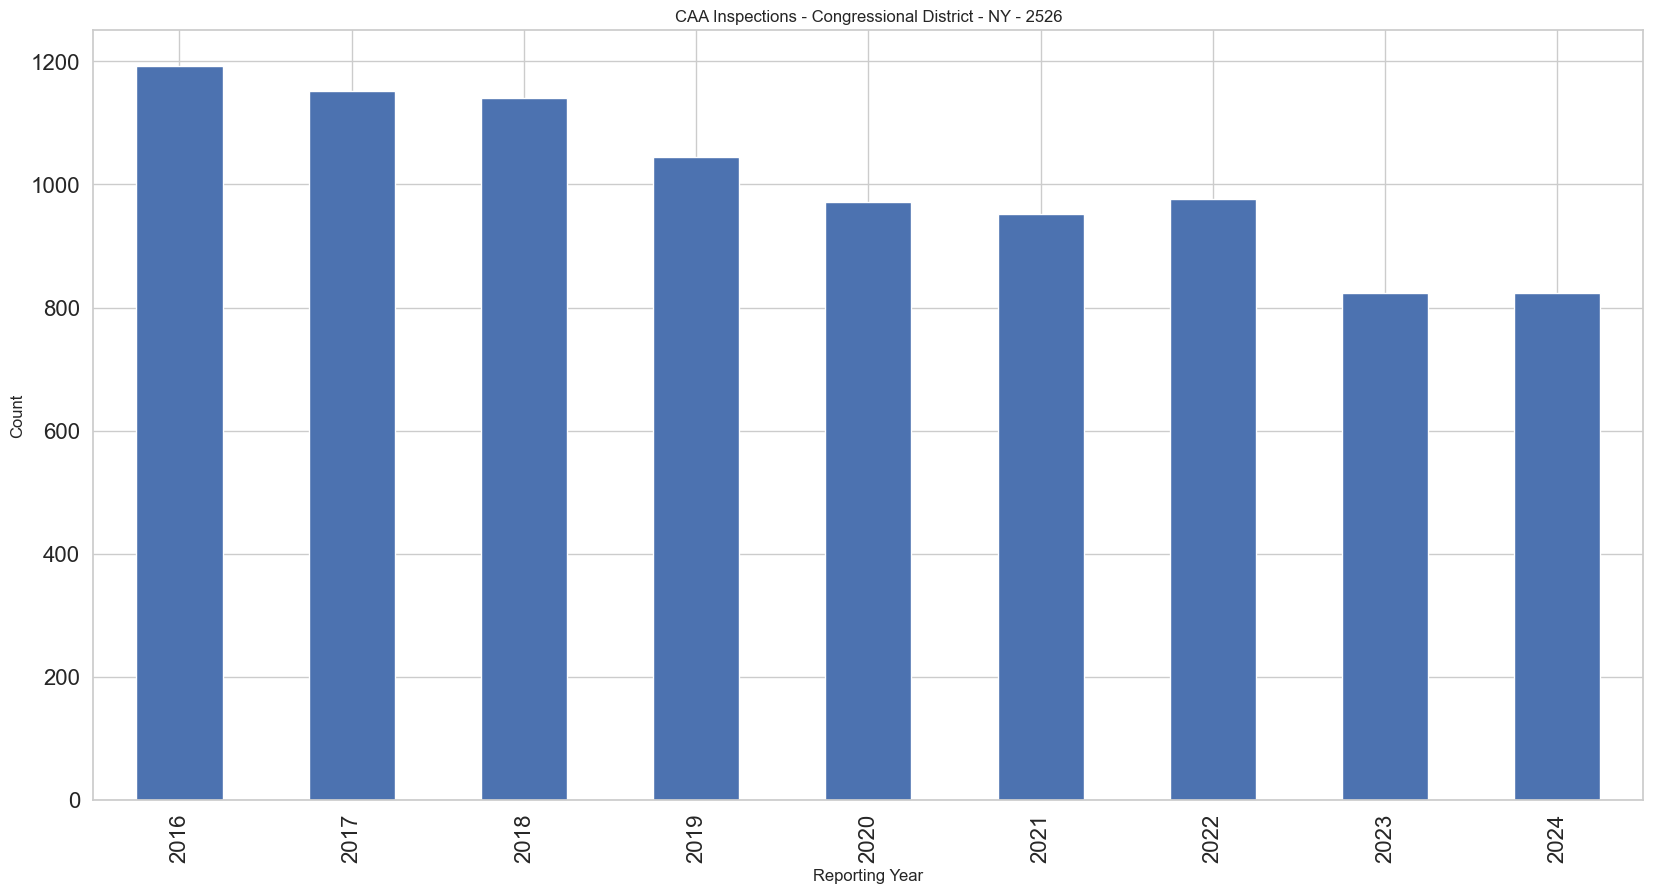

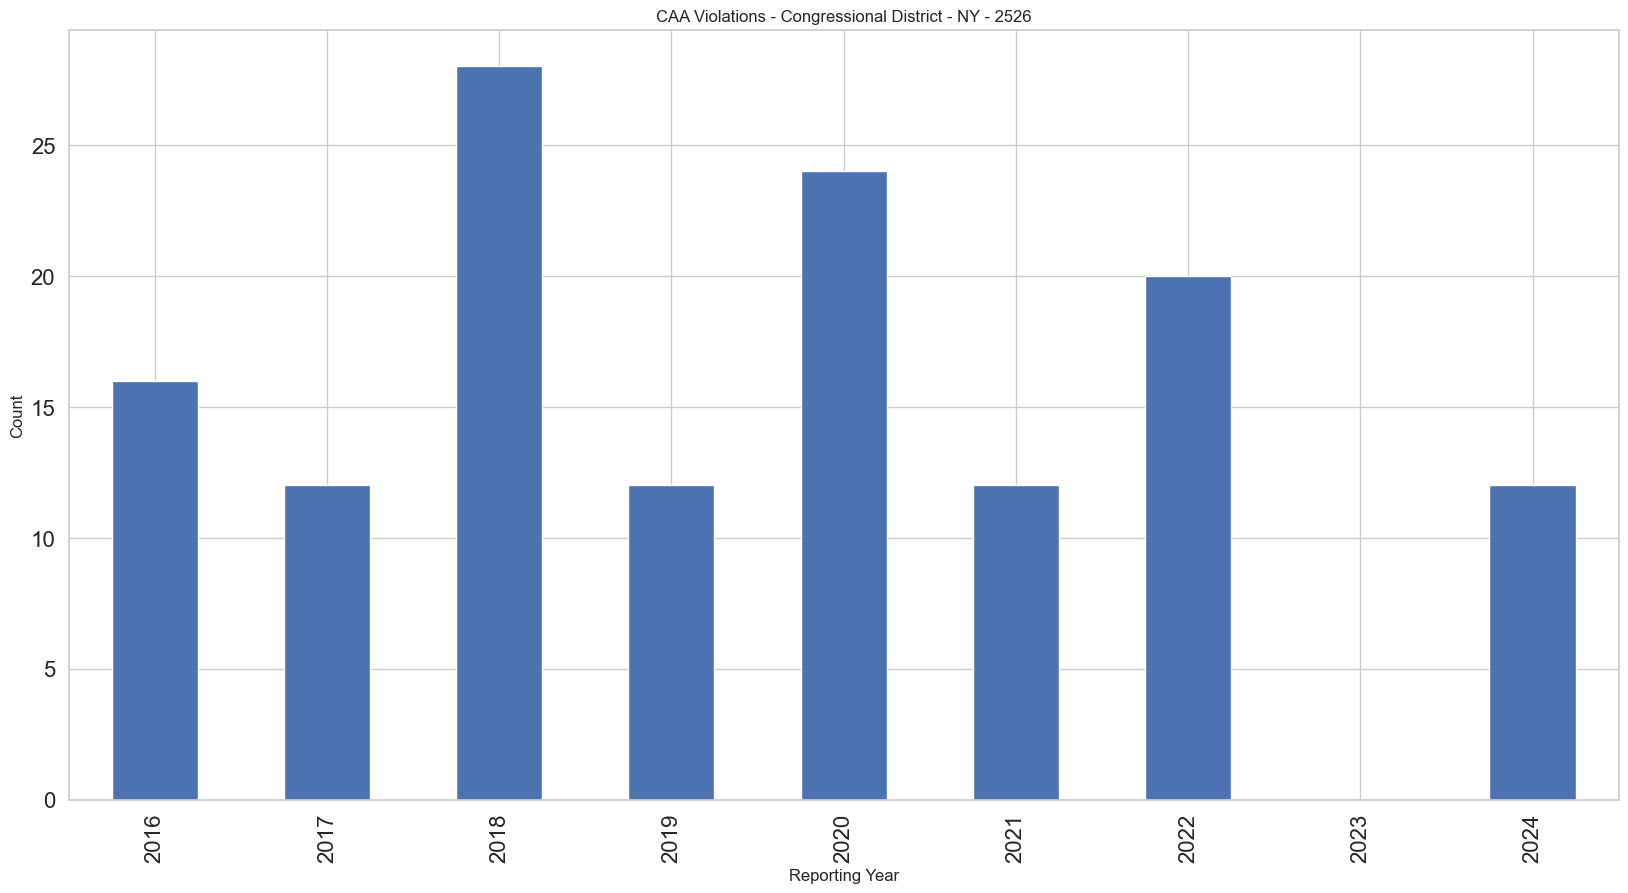

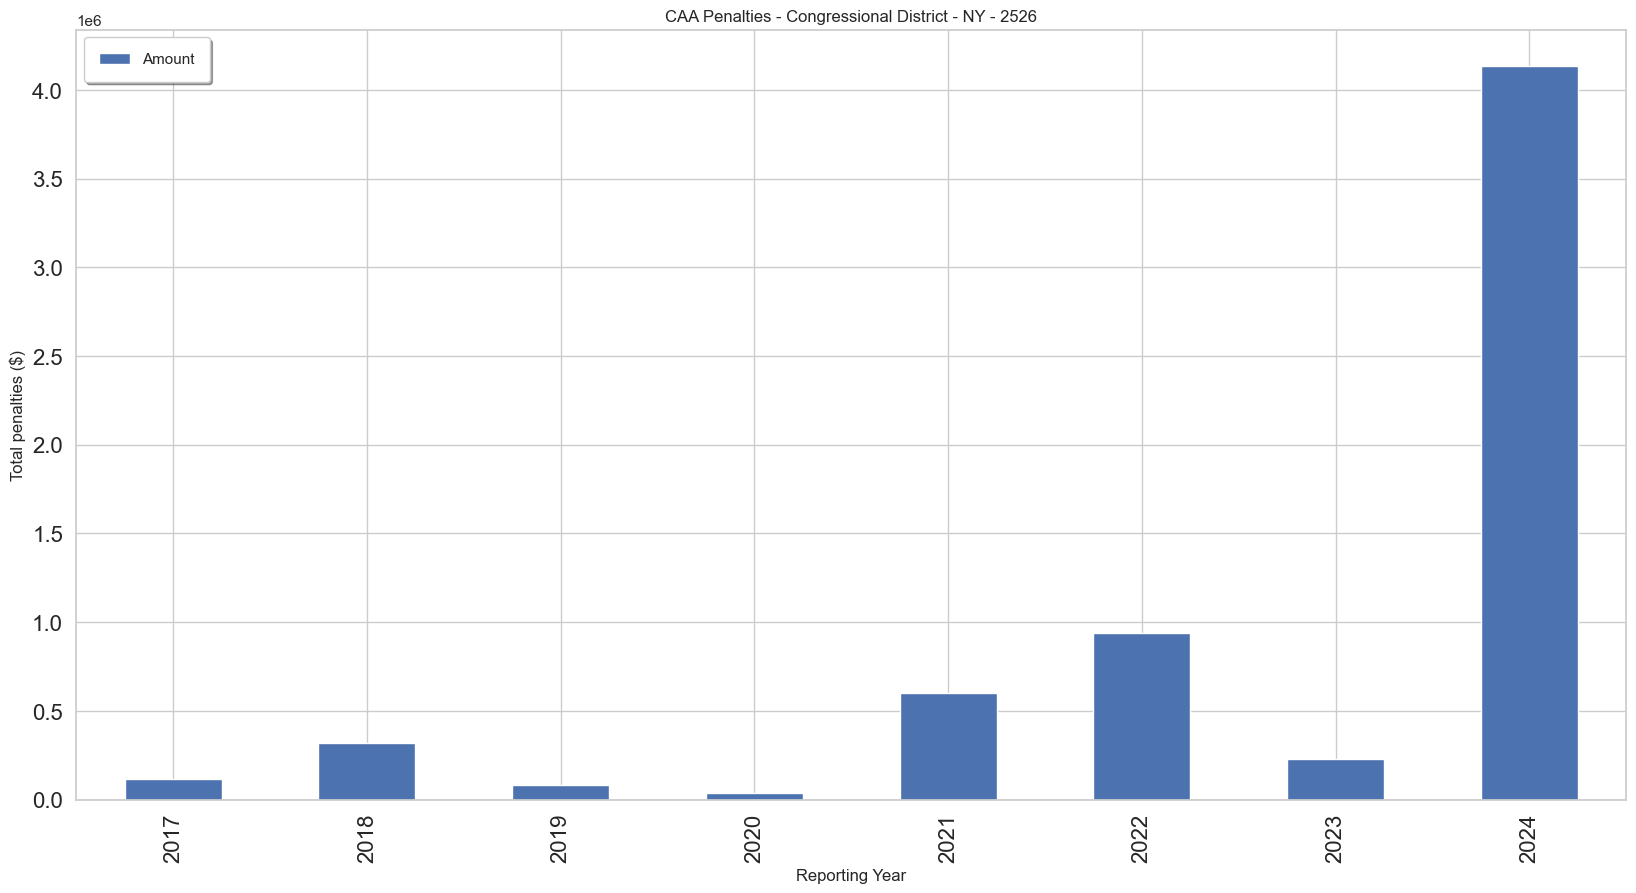

In [25]:
from ECHO_modules.make_data_sets import make_data_sets # Import relevant modules
from ECHO_modules.utilities import aggregate_by_facility, point_mapper

ny_cds_caa_inspections = data_sets["CAA Inspections"].store_results(
    region_type="Congressional District", region_value=["25", "26"], state = "NY",
    years=[2016,2024])
ny_cds_caa_violations = data_sets["CAA Violations"].store_results(
    region_type="Congressional District", region_value=["25", "26"], state = "NY",
    years=[2016,2024])
ny_cds_caa_penalties = data_sets["CAA Penalties"].store_results(
    region_type="Congressional District", region_value=["25", "26"], state = "NY",
    years=[2016,2024])

ny_cds_caa_inspections.show_chart()
ny_cds_caa_violations.show_chart()
ny_cds_caa_penalties.show_chart()

## GHGs and other Air Emissions
Beyond enforcement and compliance information, the ECHO database - and our copy of it at Stony Brook University - contains records of industry's self-report releases of various pollutants. These records originate from the Greenhouse Gas Reporting Program and the Toxics Release Inventory (TRI).

The following code returns these records for New York state. If you are interested in a specific GHG or TRI pollutant, some analysis would have to be written outside existing ECHO_modules - we haven't developed specific code to filter these tables to a pollutant(s). An example of this extra code is shown below, however - `ny_tri.dataframe.loc[ny_tri.dataframe['POLLUTANT_NAME'].str.lower().str.contains("mercury")]`

POLL_RPT_COMBINED_EMISSIONS
Data last modified: 2025-03-07 02:49:25
State
NY
NY
select * from GREENHOUSE_GASES_MVIEW where FAC_STATE = 'NY'


GREENHOUSE_GASES_MVIEW_1757996954.json: 3.77MiB [00:00, 31.4MiB/s]


Reading data...
REGISTRY_ID
There were 5266 program records found
got the data


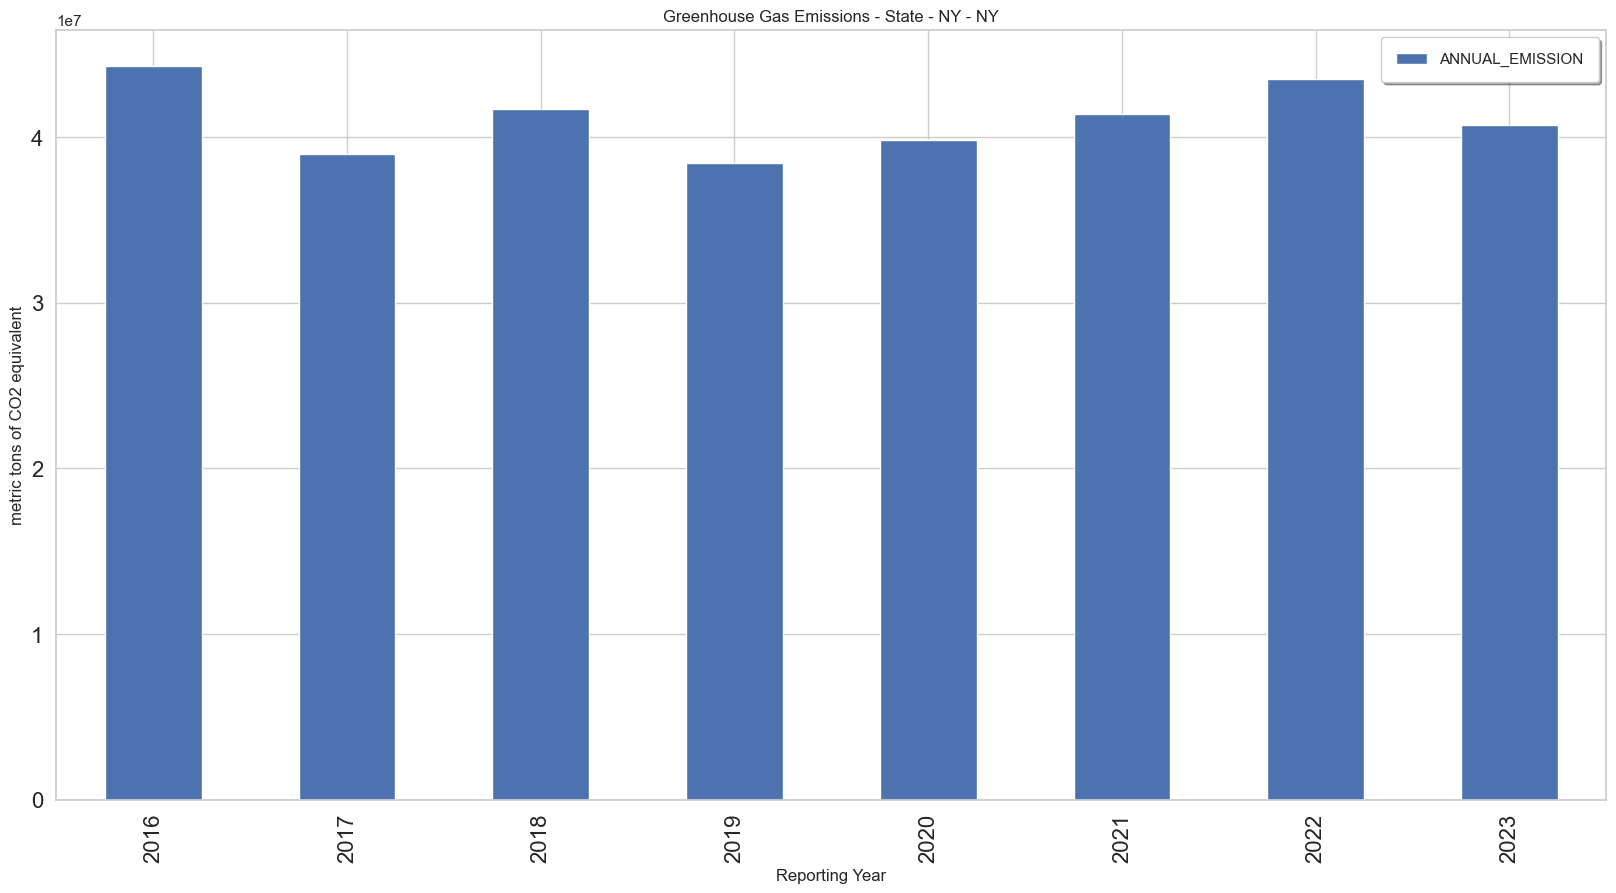

In [26]:
from ECHO_modules.make_data_sets import make_data_sets # Import relevant modules
from ECHO_modules.utilities import aggregate_by_facility, point_mapper

ny_ghg = data_sets["Greenhouse Gas Emissions"].store_results(
    region_type="State", region_value = "NY", state = "NY",
    years=[2016,2024])
ny_ghg.show_chart() # Total reported emissions in lbs (normalized to CO2e)

POLL_RPT_COMBINED_EMISSIONS
Data last modified: 2025-03-07 02:49:25
State
NY
NY
select * from TOXIC_RELEASES_MVIEW where FAC_STATE = 'NY'


TOXIC_RELEASES_MVIEW_1757996969.json: 11.8MiB [00:00, 56.5MiB/s]


Reading data...
REGISTRY_ID
There were 16091 program records found
got the data


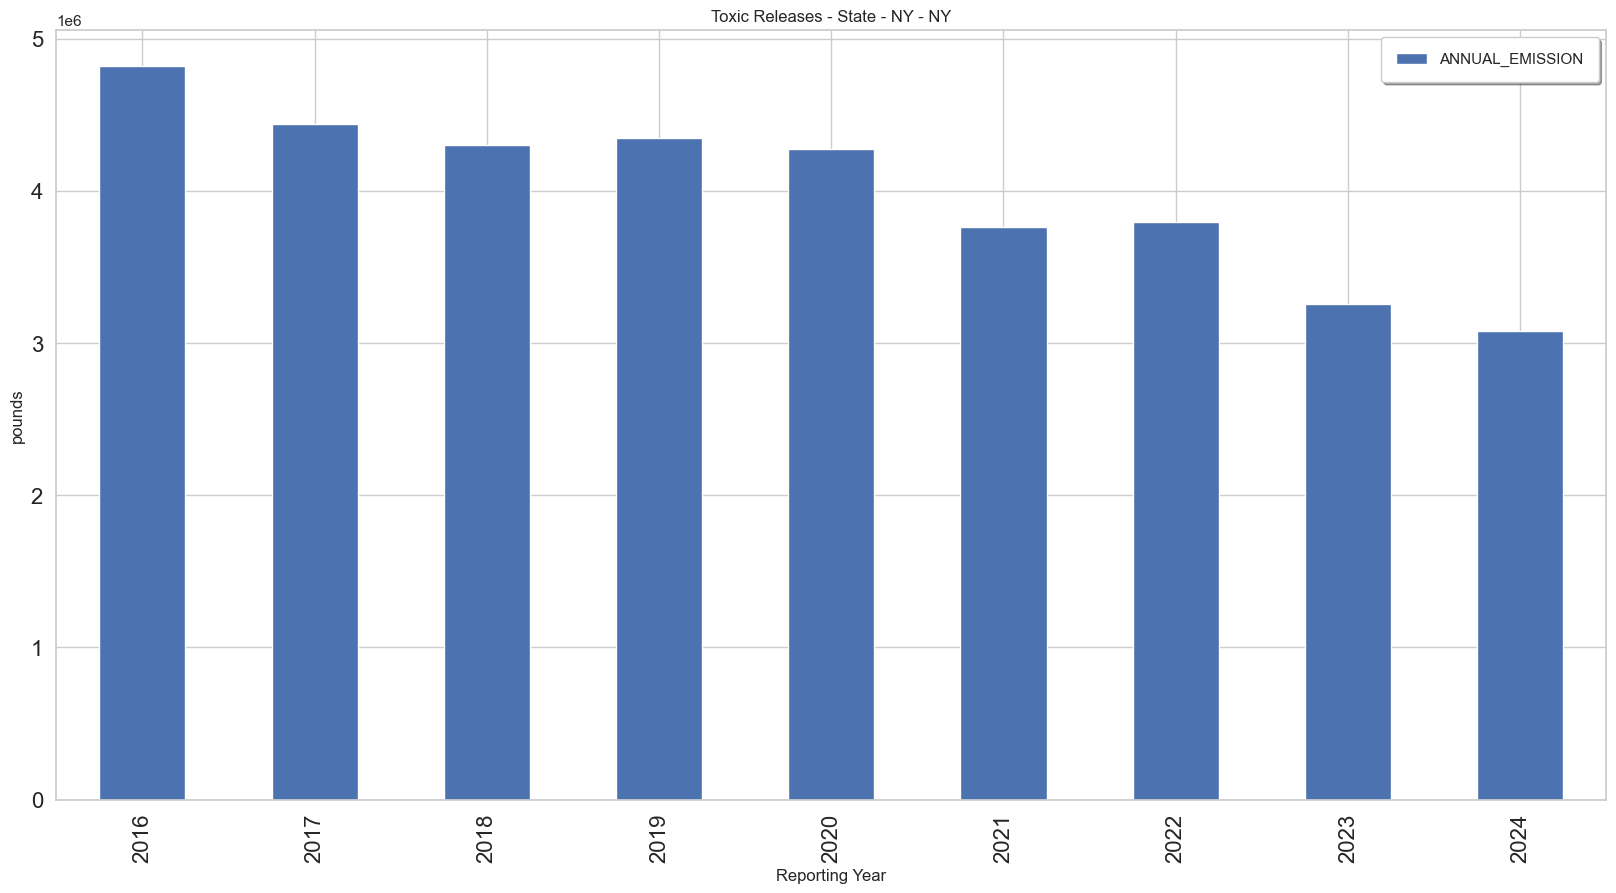

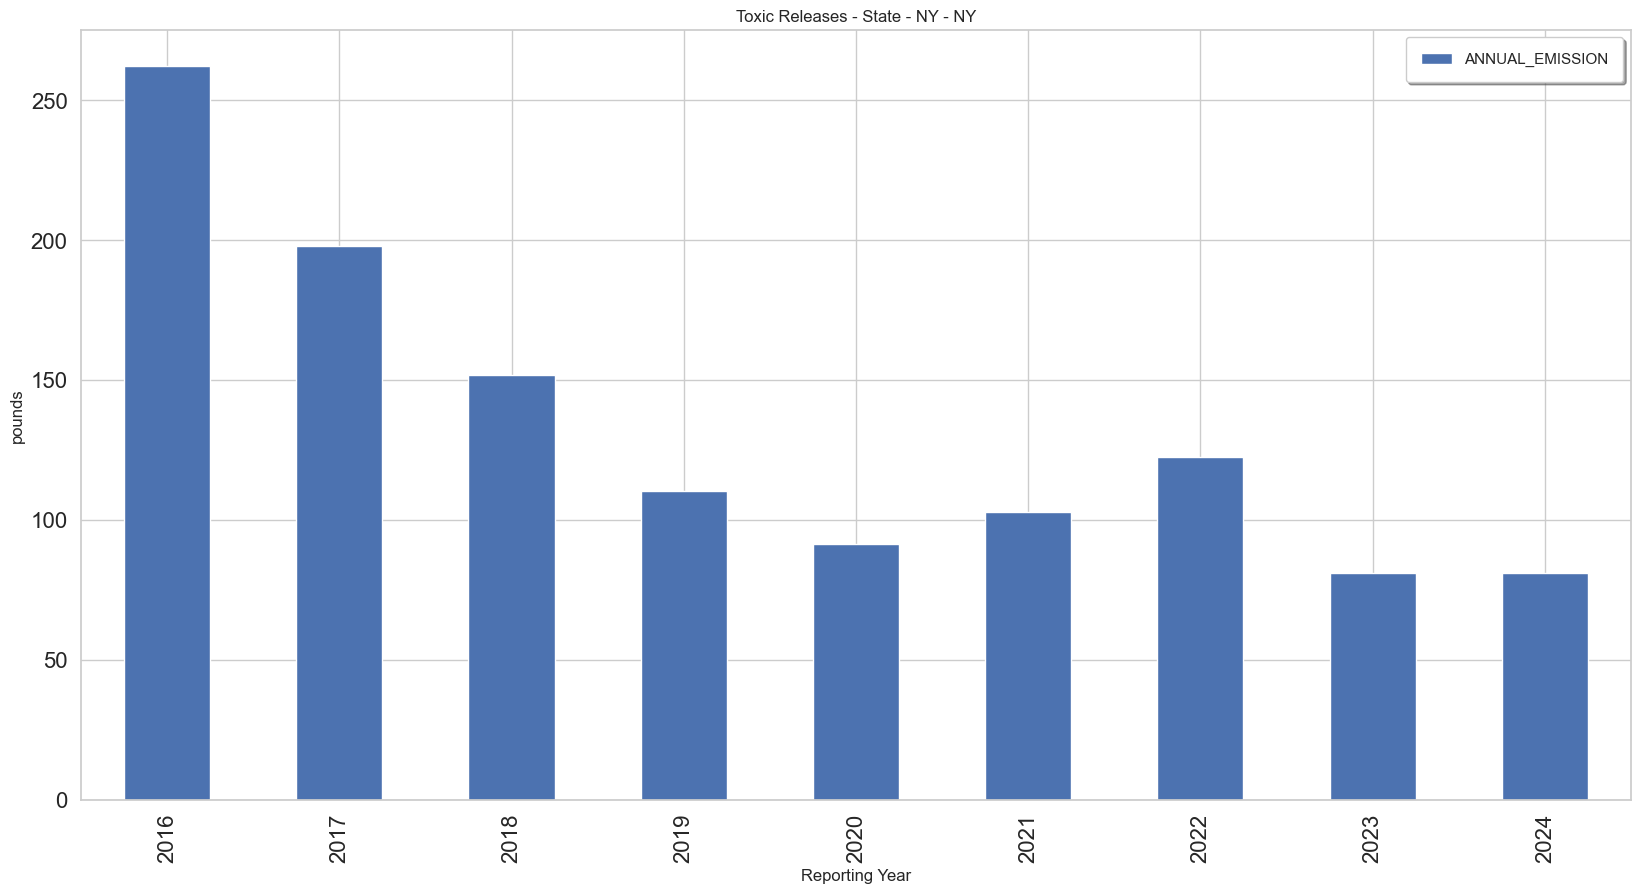

In [28]:
ny_tri = data_sets["Toxic Releases"].store_results(
    region_type="State", region_value = "NY", state = "NY",
    years=[2016,2024])
ny_tri.show_chart() # Total emissions in lbs

# Filter NY_TRI records to just ones where the pollutant is mercury
ny_tri.dataframe = ny_tri.dataframe.loc[
    ny_tri.dataframe['POLLUTANT_NAME'].str.lower().str.contains("mercury")]
ny_tri.show_chart() # Chart total mercury emissions in lbs

## Discharge Monitoring Reports (DMRs)

Facilities regulated under the Clean Water Act are required to submit monitoring reports directly to EPA. These represent extensive records of levels of pollutants discharged into waterbodies. We currently provide access to reports from Fiscal Year 2022.

The following code maps facilities with DMRs across two watersheds (note: watershed IDs currently have to be looked up separately. See "Watersheds" section above).

In [29]:
from ECHO_modules.get_data import get_spatial_data # Module for getting spatial data from the SBU database
from ECHO_modules.geographies import spatial_tables # Variables that support spatial queries
from ECHO_modules.utilities import bivariate_map, map_style # Use this function and variable to make our map
import geopandas

dmrs = data_sets["2022 Discharge Monitoring"].store_results(region_type="Watershed",
                                                     region_value = '04120103, 04120102')
# The facilities in this watershed
dmrs.dataframe = dmrs.dataframe.drop_duplicates(subset=["FAC_NAME"])
# Query and return spatial data
watersheds, state = get_spatial_data(region_type = "Watershed", states = ["NY"],
                                     spatial_tables = spatial_tables,
                                     region_filter = ["04120103", "04120102"])
# Map each unique DMR-reporting facility in these watersheds
# We only keep the columns we need (name, geometry) and use them for pop-ups
# with the fields/aliases parameters
bivariate_map(regions = watersheds[["name", "geometry"]],
              points = geopandas.GeoDataFrame(dmrs.dataframe,
                                              geometry=geopandas.points_from_xy(
                                                  dmrs.dataframe['FAC_LONG'],
                                                  dmrs.dataframe['FAC_LAT']),
                                                  crs=4269
                                              )[["FAC_NAME", "geometry"]],
              region_fields=["name",],
              region_aliases=["Watershed Name: ",],
              points_fields=["FAC_NAME",],
              points_aliases=["Facility Name: "],
              )

NPDES_DMRS_FY2022
Data last modified: 2025-04-01 00:18:25
Watershed
04120103, 04120102
None
select * from DMR_FY2022_MVIEW where FAC_DERIVED_HUC in ('04120103','04120102')


DMR_FY2022_MVIEW_1757996980.json: 69.6MiB [00:00, 115MiB/s] 


Reading data...
EXTERNAL_PERMIT_NMBR
There were 64584 program records found
got the data
Success: retrieved the watershed geojson!
Creating a geopandas dataframe ...
Success: retrieved the TIGER geojson!
Creating a geopandas dataframe ...


## Mapping
We can symbolize inspections, violations, and so on for areas such as ZIP Codes and Congressional Districts using the `choropleth()` function.

In [30]:
# Function for aggregating data by spatial unit and mapping data values by that unit (e.g. ZIP code)
from ECHO_modules.utilities import aggregate_by_geography, choropleth
from ECHO_modules.get_data import get_spatial_data # Function for getting zip code boundaries
from ECHO_modules.geographies import spatial_tables # Variables that support spatial queries

zips = '14201, 14202, 14203, 14204, 14205, 14206, 14207, 14208, 14209, 14210, 14211, \
14212, 14213, 14214, 14215, 14216, 14217, 14218, 14219, 14220, 14221, 14222, \
14223, 14224, 14225, 14226, 14227, 14228, 14231, 14233, 14240, 14241, 14260, \
14261, 14263, 14264, 14265, 14267, 14269, 14270, 14272, 14273, 14276, 14280'
# Create a duplicate but differently formatted list for the get_spatial_data function
zips_list = [str(z) for z in zips.split(", ")]

# Get attribute data
ny_zips_cwa_inspections = data_sets["CWA Violations"].store_results(region_type="Zip Code",
                                                             region_value=zips, state = "NY",
                                                             years=[2020,2024]) # Store results for this DataSet as a DataSetResults object


# Aggregate attribute data
ny_zips_aggregated = aggregate_by_geography(ny_zips_cwa_inspections,
                                            agg_type="sum",
                                            spatial_tables=spatial_tables, 
                                            region_filter=zips_list)
# Reset the index to make the zip codes available to the choropleth function
ny_zips_aggregated.reset_index(inplace=True)

# Map
choropleth(polygons = ny_zips_aggregated,
           attribute = "NUME90Q",
           key_id = "FAC_ZIP",
           legend_name = "Map")

NPDES_QNCR_HISTORY
Data last modified: 2025-04-02 05:01:32
Zip Code
14201, 14202, 14203, 14204, 14205, 14206, 14207, 14208, 14209, 14210, 14211, 14212, 14213, 14214, 14215, 14216, 14217, 14218, 14219, 14220, 14221, 14222, 14223, 14224, 14225, 14226, 14227, 14228, 14231, 14233, 14240, 14241, 14260, 14261, 14263, 14264, 14265, 14267, 14269, 14270, 14272, 14273, 14276, 14280
NY
select * from WATER_QUARTERLY_VIOLATIONS_MVIEW where FAC_ZIP in ('14201','14202','14203','14204','14205','14206','14207','14208','14209','14210','14211','14212','14213','14214','14215','14216','14217','14218','14219','14220','14221','14222','14223','14224','14225','14226','14227','14228','14231','14233','14240','14241','14260','14261','14263','14264','14265','14267','14269','14270','14272','14273','14276','14280')


WATER_QUARTERLY_VIOLATIONS_MVIEW_1757996990.json: 14.2MiB [00:00, 97.7MiB/s]


Reading data...
NPDES_ID
There were 4728 program records found
got the data
STATE IN ('NY') AND ZIP_CODE IN ('14201', '14202', '14203', '14204', '14205', '14206', '14207', '14208', '14209', '14210', '14211', '14212', '14213', '14214', '14215', '14216', '14217', '14218', '14219', '14220', '14221', '14222', '14223', '14224', '14225', '14226', '14227', '14228', '14231', '14233', '14240', '14241', '14260', '14261', '14263', '14264', '14265', '14267', '14269', '14270', '14272', '14273', '14276', '14280')
Success: retrieved the US Zip Code geojson!
Creating a geopandas dataframe ...
Success: retrieved the TIGER geojson!
Creating a geopandas dataframe ...


## Custom Queries: EJScreen

Records from EPA's EJScreen (2021) are available through custom SQL queries.

For example, the following returns EJScreen information for the state of New York and where the % of the population defined as a racial minority is greater than 75% and the % of the population defined as low-income is greater than 50%.

For more information about EJScreen, see the [documentation](https://gaftp.epa.gov/EJScreen/2021/2021_EJSCREEEN_columns-explained.xlsx) (.xlsx file).

In [ ]:
"""
# Won't work until we load EJScreen data
from ECHO_modules.get_data import get_echo_data

# This query selects Census Block Group records from EJScreen for the state of New York and where the % of the population defined as a racial minority is greater than 75% and the % of the population defined as low-income is greater than 50%
sql = 'SELECT * FROM "EJSCREEN_2021_USPR" WHERE "ST_ABBREV" = \'NY\' ' +\
'AND "MINORPCT" > .75 AND "LOWINCPCT" > .5'
results = get_echo_data(sql)
results
"""